In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (990755, 80)
X teste =  (424610, 80)
y multiclasse treino =  (990755,)
y multiclasse teste =  (424610,)
y binário treino =  (990755,)
y binário teste =  (424610,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[4.45000063e-04, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.94183389e-04, 9.10092010e-06, 1.37022903e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.18057941e-01, 2.27523003e-05, 2.39790081e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.08977515e-03, 0.00000000e+00, 3.42557258e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.05141724e-04, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66666690e-06, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1008718    BENIGN
1092907    BENIGN
1034897       DoS
727692     BENIGN
1200733    BENIGN
            ...  
259178     BENIGN
1414414    BENIGN
131932     BENIGN
671155     BENIGN
121958     BENIGN
Name: Label_multiclass, Length: 990755, dtype: object
1008718    0
1092907    0
1034897    1
727692     0
1200733    0
          ..
259178     0
1414414    0
131932     0
671155     0
121958     0
Name: Label_binary, Length: 990755, dtype: int64


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [10]:
with open('df_cic_test50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [11]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1415365, 80)
y multiclasse =  (1415365,)
y binário =  (1415365,)


In [12]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [14]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 1, 0, ..., 0, 1, 0])

In [16]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['BENIGN', 'DoS', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [17]:
#X_test50.head()
X_test50

array([[4.90719986e-02, 9.10092010e-06, 3.42557258e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.75000025e-07, 4.55046005e-06, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.48333354e-06, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.23333351e-06, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.92338306e-01, 2.73027603e-05, 2.05534355e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.54333369e-04, 0.00000000e+00, 3.42557258e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [18]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['BENIGN' 'DoS' 'BENIGN' ... 'BENIGN' 'DoS' 'BENIGN']
[0 1 0 ... 0 1 0]


# Algoritmo RandomForest para Train e Validation - Train50

In [19]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [20]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [21]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [22]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [23]:
predict_train50_binary

array([1, 1, 0, ..., 1, 1, 0])

In [24]:
y_train50_binary_test

array([1, 1, 0, ..., 1, 1, 0])

In [25]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9783848708226373

### Visualização da árvore binária

In [26]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

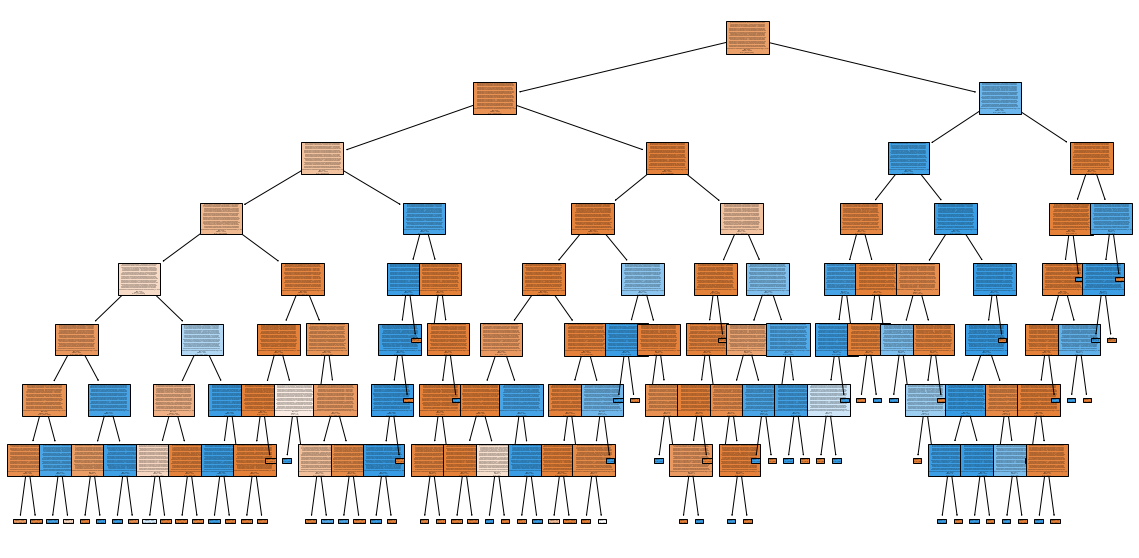

In [27]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [28]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [29]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [30]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [31]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [32]:
predict_train50_multiclass

array(['DoS', 'PortScan', 'BENIGN', ..., 'DoS', 'DoS', 'BENIGN'],
      dtype=object)

In [33]:
y_train50_multiclass_test

array(['DoS', 'PortScan', 'BENIGN', ..., 'DoS', 'DoS', 'BENIGN'],
      dtype=object)

In [34]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9907373825392713

### Visualização da árvore multiclasse

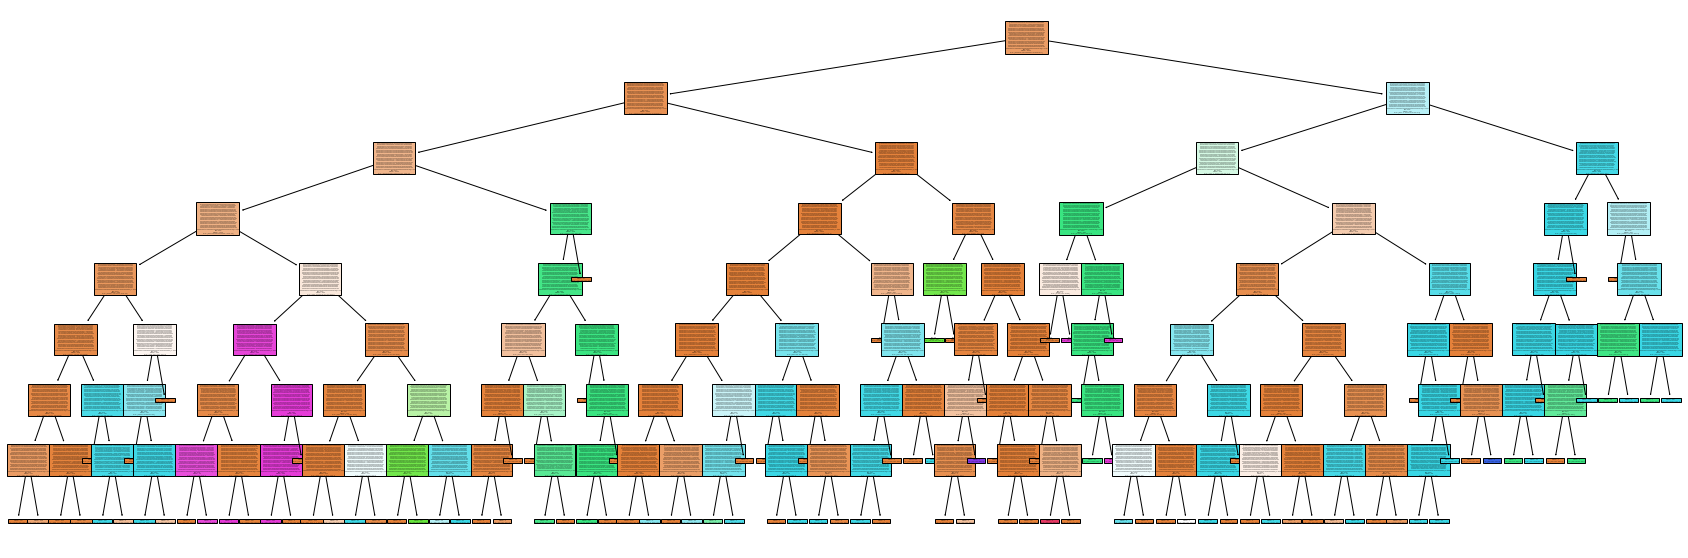

In [35]:
plt.figure(figsize=(30,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [36]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [37]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.973934  0.999848  0.986721    341041
           1   0.999302  0.890797  0.941935     83569

    accuracy                       0.978385    424610
   macro avg   0.986618  0.945322  0.964328    424610
weighted avg   0.978927  0.978385  0.977906    424610



In [38]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.988919  0.999669  0.994265    341041
      BotNet   1.000000  0.023026  0.045016       304
  BruteForce   1.000000  0.994722  0.997354      2084
        DDoS   0.998896  0.997951  0.998423     19034
         DoS   0.997362  0.921133  0.957733     37760
Infiltration   1.000000  0.000000  0.000000         3
    PortScan   1.000000  0.992976  0.996476     24061
   WebAttack   1.000000  0.000000  0.000000       323

    accuracy                       0.990737    424610
   macro avg   0.998147  0.616185  0.623658    424610
weighted avg   0.990816  0.990737  0.989900    424610



### Cross Validation do train50

In [39]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [40]:
score_cv_train50_binary

array([0.98775687, 0.99197586, 0.99090597, 0.99185474, 0.99164278,
       0.99206662, 0.98618219, 0.99244007, 0.98450669, 0.99196568])

In [41]:
cv_result_train50_binary

[0.9901297460144146]

In [42]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [43]:
score_cv_train50_multiclass

array([0.99048205, 0.99059308, 0.9907142 , 0.99046187, 0.98964431,
       0.99062327, 0.9902599 , 0.99086551, 0.99056271, 0.99039112])

In [44]:
cv_result_train50_multiclass

[0.9904598012661978]

### Matriz de Confusão do train50

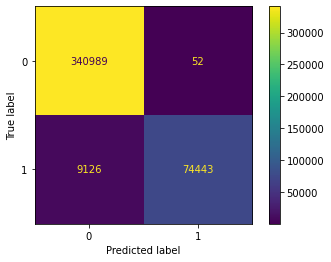

In [45]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

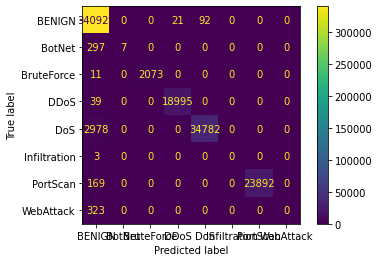

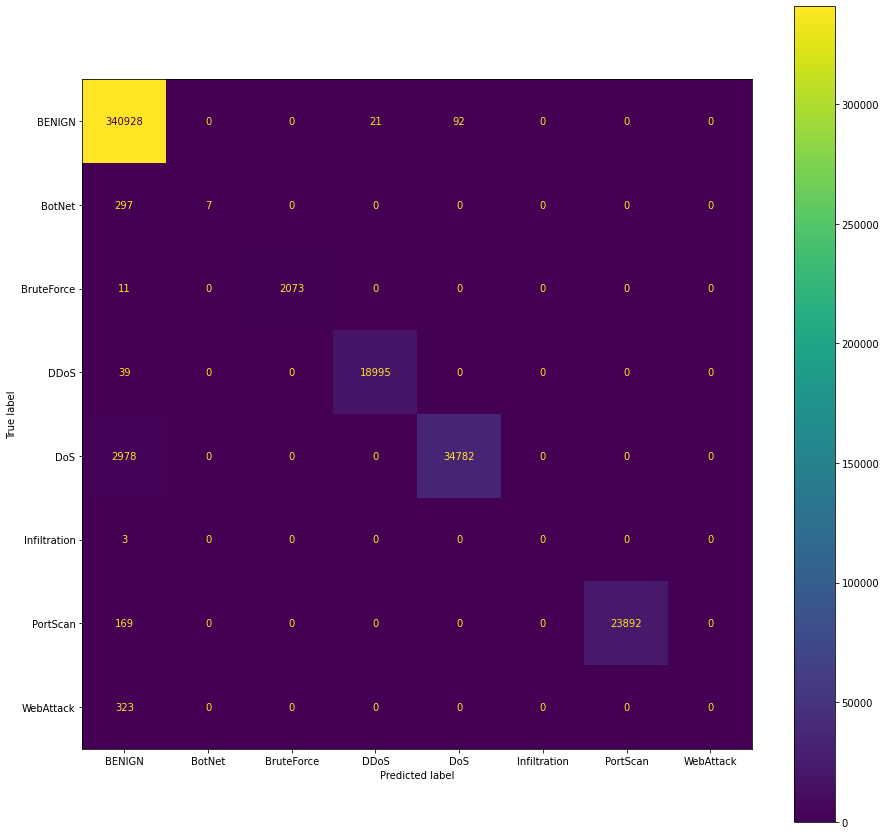

In [46]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [47]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [48]:
predict_test50_binary

array([0, 0, 0, ..., 0, 1, 0])

In [49]:
y_test50_binary

array([0, 1, 0, ..., 0, 1, 0])

In [50]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.978146979754339

### Predição test50 multiclasse

In [51]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [52]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [53]:
y_test50_multiclass

array(['BENIGN', 'DoS', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [54]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.990623620055604

### Precision e Recall do test50

In [55]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.973661  0.999833  0.986573   1136548
           1   0.999235  0.889748  0.941319    278817

    accuracy                       0.978147   1415365
   macro avg   0.986448  0.944791  0.963946   1415365
weighted avg   0.978699  0.978147  0.977659   1415365



In [56]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.988777  0.999670  0.994194   1136548
      BotNet   1.000000  0.017312  0.034034       982
  BruteForce   1.000000  0.995952  0.997972      6917
        DDoS   0.998718  0.997891  0.998304     64013
         DoS   0.997487  0.920486  0.957441    126330
  Heartbleed   1.000000  1.000000  1.000000         5
Infiltration   1.000000  0.000000  0.000000        17
    PortScan   1.000000  0.992235  0.996103     79464
   WebAttack   1.000000  0.000000  0.000000      1089

    accuracy                       0.990624   1415365
   macro avg   0.998331  0.658172  0.664227   1415365
weighted avg   0.990706  0.990624  0.989782   1415365



### Matriz de Confusão do test50

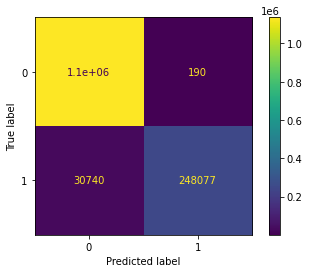

In [57]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

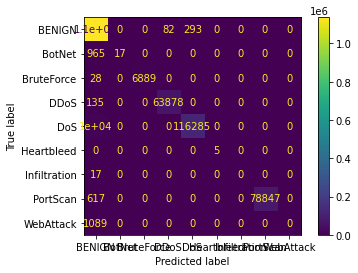

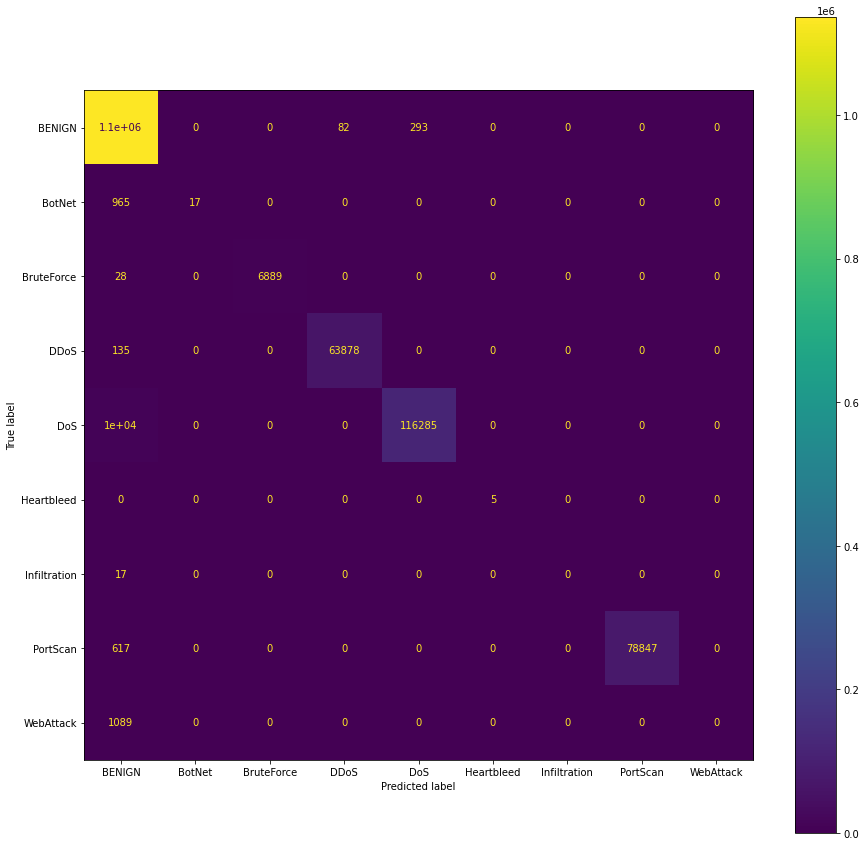

In [58]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)